In [1]:
import json
from pathlib import Path
import os
import time

import fitz
import pandas as pd
from pydantic_settings import BaseSettings, SettingsConfigDict

class Settings(BaseSettings):
    model_config = SettingsConfigDict(
        env_file="../.env", env_file_encoding="utf-8", extra="ignore"
    )
    data_dir: str
    docling_model_dir: str
    
settings = Settings()
os.environ["HF_HOME"] = settings.docling_model_dir

In [2]:
import sys
sys.path.append("src")

# Load Converter

In [3]:
# Import docling
from docling.datamodel.base_models import InputFormat
from docling.document_converter import (
    DocumentConverter,
    PdfFormatOption,
    WordFormatOption,
)
from docling.pipeline.simple_pipeline import SimplePipeline
from docling.pipeline.standard_pdf_pipeline import StandardPdfPipeline
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.backend.docling_parse_v2_backend import DoclingParseV2DocumentBackend
from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend

from docling.datamodel.document import ConversionResult

IMAGE_RESOLUTION_SCALE = 2.0

pdf_format_options = PdfPipelineOptions()
pdf_format_options.images_scale = IMAGE_RESOLUTION_SCALE
pdf_format_options.generate_page_images = True
pdf_format_options.generate_picture_images = True

pdf_format_options.do_ocr = False
# pdf_format_options.do_table_structure = False
pdf_format_options.do_table_structure = True

converter = DocumentConverter(
    allowed_formats=[
            InputFormat.PDF,
            # InputFormat.IMAGE,
            # InputFormat.DOCX,
            # InputFormat.HTML,
            # InputFormat.PPTX,
    ],
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pdf_format_options, # pipeline options go here.
            # backend=PyPdfiumDocumentBackend # optional: pick an alternative backend
            backend=DoclingParseV2DocumentBackend # optional: pick an alternative backend
        ),
    }
)

# Conversion

In [4]:
# file_path = "resources/finance-cid-sample.pdf"
file_path = "resources/finance-small-images.pdf"
result = converter.convert(file_path)
finance_document = result.document

In [5]:
finance_document.print_element_tree()

 0: unspecified with name=_root_
  1: section_header
  2: section_header
  3: key_value_area with name=group
   4: text
   5: text
  6: picture
  7: section_header
  8: section_header
  9: table
  10: section_header
  11: table
  12: key_value_area with name=group
   13: text
  14: page_footer
  15: form_area with name=group
   16: text
   17: text
   18: section_header
  19: page_footer
  20: form_area with name=group
   21: section_header
   22: text
  23: page_footer
  24: picture
  25: text
  26: page_footer
  27: section_header
  28: section_header
  29: list with name=list
   30: list_item
   31: list_item
   32: list_item
   33: list_item
  34: text
  35: list with name=list
   36: list_item
  37: text
  38: list with name=list
   39: list_item
  40: text
  41: text
  42: section_header
  43: section_header
  44: picture
  45: section_header
  46: table
  47: footnote
  48: text
  49: picture
  50: table
  51: text
  52: page_footer
  53: text
  54: picture


In [6]:
def _get_textitem_by_cref(cref: str, document: "DoclingDocument") -> "TextItem":
    item_id = cref.split("/")[-1]
    return document.texts[int(item_id)]

self_ref='#/pictures/0' parent=RefItem(cref='#/body') children=[] label=<DocItemLabel.PICTURE: 'picture'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=199.6288604736328, t=138.40911865234375, r=383.9383239746094, b=65.2540283203125, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))] captions=[] references=[] footnotes=[] image=ImageRef(mimetype='image/png', dpi=144, size=Size(width=369.0, height=146.0), uri=AnyUrl('')) annotations=[]
SIZE: 369*146 = 53874
self_ref='#/pictures/1' parent=RefItem(cref='#/body') children=[RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18')] label=<DocItemLabel.PICTURE: 'picture'> prov=[ProvenanceItem(page_no=5, bbox=BoundingBox(l=55.074668884277344, t=772.9478149414062, r=535.7874755859375, b=433.40380859375, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))] captions=[] references=[] footnotes=[] image=ImageRef(mimetype='image/png', dpi=144, size=Size(width=962.0, height=679.0)
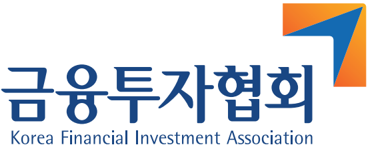
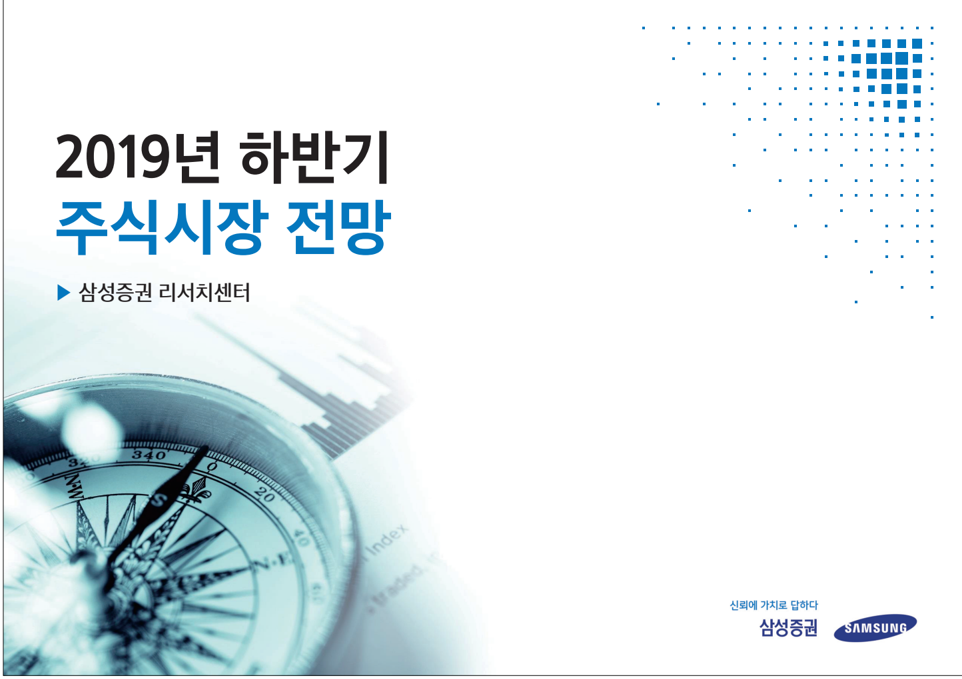
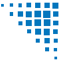
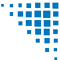

PIL.PngImagePlugin.PngImageFile

In [7]:
def _does_image_satisfy_min_size(image: "PIL.Image", min_size: int) -> bool:
    if (image.width * image.height) >= min_size:
        return True
    else:
        return False

for item in finance_document.pictures:
    print(item)
    # print(item.children)
    
    # for child in item.children:
    #     child_cref = child.cref
    #     child_item = _get_textitem_by_cref(child_cref, finance_document)
    #     print(child_item.text)
    
    image = item.get_image(doc=finance_document)
    print("SIZE: {}*{} = {}".format(image.width, image.height, image.width * image.height))
    # show image here
    image.show()
type(image)